# pyCisTopic scATAC processing

In [1]:
import pycisTopic
import pandas as pd
import os
pycisTopic.__version__

'2.0a0'

In [3]:
os.chdir(os.getcwd())

In [5]:
out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

# Get cell annotation from RNA

In [6]:
import scanpy as sc

In [ ]:
rna = sc.read_h5ad("multiome_adata_Q3_short_09072025.h5ad")

In [8]:
rna

AnnData object with n_obs × n_vars = 2479 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'final_annotations'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_int

In [9]:
rna.obs

,sample,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine,final_annotations
AAACAGCCAGCATGGA-1,Q3,4385,2329,7.753624,4450.0,8.400884,15.146067,8.629213,1.932584,0.0,...,2,1,0,2,43,B-cell lineage,0.983375,Pro-B cells,0.882067,Tumour (Q3)
AAACAGCCATGCTATG-1,Q3,417,979,6.887553,1302.0,7.172425,14.362519,8.832565,2.995392,0.0,...,8,6,45,109,88,B-cell lineage,0.311070,Pro-B cells,0.062003,Tumour (Q3)
AAACATGCATGAATCT-1,Q3,5476,1928,7.564757,3443.0,8.144389,18.123729,12.460064,3.194888,0.0,...,8,20,51,46,234,B cells,0.233567,Pro-B cells,0.035874,Tumour (Q3)
AAACCAACAGCATTAT-1,Q3,12893,2235,7.712444,4611.0,8.436417,22.554760,16.916071,3.600087,0.0,...,1,14,20,117,76,B-cell lineage,0.933031,Pro-B cells,0.999537,Tumour (Q3)
AAACCGAAGCACAGAA-1,Q3,4237,1277,7.153052,2124.0,7.661527,17.184557,10.122410,2.824859,0.0,...,4,22,64,77,217,B-cell lineage,0.054315,Pro-B cells,0.003416,Tumour (Q3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-1,Q3,7190,1494,7.309881,2410.0,7.787797,18.298755,12.697096,2.489627,0.0,...,9,5,3,8,241,B-cell lineage,0.103472,Pro-B cells,0.638477,Tumour (Q3)
TTTGTGAAGCGAGTAA-1,Q3,16787,1178,7.072422,1824.0,7.509336,18.750000,13.760964,3.728070,0.0,...,8,6,25,47,150,B-cell lineage,0.224812,Pro-B cells,0.096180,Tumour (Q3)
TTTGTGAAGCTTTGGG-1,Q3,35783,2229,7.709757,4256.0,8.356320,15.625000,8.764098,1.785714,0.0,...,13,4,58,102,216,B-cell lineage,0.076792,Pro-B cells,0.726579,Tumour (Q3)
TTTGTGGCAGCCTGCA-1,Q3,1763,1218,7.105786,2328.0,7.753194,26.159794,19.630585,2.706186,0.0,...,12,19,40,142,242,B cells,0.821791,Pro-B cells,0.045458,Tumour (Q3)


In [10]:
rna.obs.celltypist_cell_label_fine.value_counts()

Pro-B cells                  1955
Tem/Trm cytotoxic T cells     203
Tcm/Naive helper T cells      166
Classical monocytes            92
Naive B cells                  24
Memory B cells                 21
Mid erythroid                  18
Name: celltypist_cell_label_fine, dtype: int64

In [11]:
rna.obs[["sample","celltypist_cell_label_fine"]].value_counts()

sample  celltypist_cell_label_fine
Q3      Pro-B cells                   1955
        Tem/Trm cytotoxic T cells      203
        Tcm/Naive helper T cells       166
        Classical monocytes             92
        Naive B cells                   24
        Memory B cells                  21
        Mid erythroid                   18
dtype: int64

/opt/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


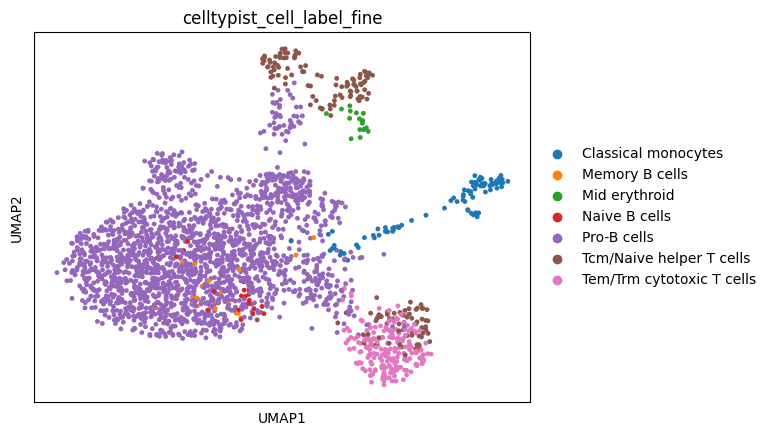

In [12]:
sc.pl.umap(rna, color = "celltypist_cell_label_fine")

In [13]:
rna

AnnData object with n_obs × n_vars = 2479 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'final_annotations'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_int

In [14]:
# removing less common cell types to avoid cistopic error
filtered_obs = rna.obs.groupby(["sample","celltypist_cell_label_fine"]).filter(lambda x: len(x) >= 10)
rna = rna[rna.obs.index.isin(filtered_obs.index)]

In [15]:
rna

View of AnnData object with n_obs × n_vars = 2479 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'final_annotations'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_vari

In [16]:
rna.obs['sample'].value_counts()

Q3    2479
Name: sample, dtype: int64

In [17]:
rna_cell_type = rna.obs[['celltypist_cell_label_fine','sample']] # subset to keep info on atac cb and cell type only

In [18]:
rna_cell_type

,celltypist_cell_label_fine,sample
AAACAGCCAGCATGGA-1,Pro-B cells,Q3
AAACAGCCATGCTATG-1,Pro-B cells,Q3
AAACATGCATGAATCT-1,Pro-B cells,Q3
AAACCAACAGCATTAT-1,Pro-B cells,Q3
AAACCGAAGCACAGAA-1,Pro-B cells,Q3
...,...,...
TTTGTGAAGCATGAAG-1,Pro-B cells,Q3
TTTGTGAAGCGAGTAA-1,Pro-B cells,Q3
TTTGTGAAGCTTTGGG-1,Pro-B cells,Q3
TTTGTGGCAGCCTGCA-1,Pro-B cells,Q3


In [19]:
# replace + signs with pos and white spaces with underscore
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace(' ','_')
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('+','pos')
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('/','_')
rna_cell_type['celltypist_cell_label_fine'].value_counts()

/tmp/ipykernel_3990221/2305620188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace(' ','_')
/tmp/ipykernel_3990221/2305620188.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('+','pos')
/tmp/ipykernel_3990221/2305620188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Pro-B_cells                  1955
Tem_Trm_cytotoxic_T_cells     203
Tcm_Naive_helper_T_cells      166
Classical_monocytes            92
Naive_B_cells                  24
Memory_B_cells                 21
Mid_erythroid                  18
Name: celltypist_cell_label_fine, dtype: int64

In [20]:
rna_cell_type = rna_cell_type.rename(columns={'celltypist_cell_label_fine': 'cell_type'})

In [21]:
rna_cell_type

,cell_type,sample
AAACAGCCAGCATGGA-1,Pro-B_cells,Q3
AAACAGCCATGCTATG-1,Pro-B_cells,Q3
AAACATGCATGAATCT-1,Pro-B_cells,Q3
AAACCAACAGCATTAT-1,Pro-B_cells,Q3
AAACCGAAGCACAGAA-1,Pro-B_cells,Q3
...,...,...
TTTGTGAAGCATGAAG-1,Pro-B_cells,Q3
TTTGTGAAGCGAGTAA-1,Pro-B_cells,Q3
TTTGTGAAGCTTTGGG-1,Pro-B_cells,Q3
TTTGTGGCAGCCTGCA-1,Pro-B_cells,Q3


In [23]:
rna_cell_type.loc[rna_cell_type['cell_type'] == 'Pro-B_cells', 'cell_type'] = rna_cell_type['cell_type'] + '_Q3'

In [24]:
rna_cell_type['cell_type'].value_counts()

Pro-B_cells_Q3               1955
Tem_Trm_cytotoxic_T_cells     203
Tcm_Naive_helper_T_cells      166
Classical_monocytes            92
Naive_B_cells                  24
Memory_B_cells                 21
Mid_erythroid                  18
Name: cell_type, dtype: int64

In [25]:
rna_cell_type.cell_type.value_counts()

Pro-B_cells_Q3               1955
Tem_Trm_cytotoxic_T_cells     203
Tcm_Naive_helper_T_cells      166
Classical_monocytes            92
Naive_B_cells                  24
Memory_B_cells                 21
Mid_erythroid                  18
Name: cell_type, dtype: int64

In [26]:
rna_cell_type

,cell_type,sample
AAACAGCCAGCATGGA-1,Pro-B_cells_Q3,Q3
AAACAGCCATGCTATG-1,Pro-B_cells_Q3,Q3
AAACATGCATGAATCT-1,Pro-B_cells_Q3,Q3
AAACCAACAGCATTAT-1,Pro-B_cells_Q3,Q3
AAACCGAAGCACAGAA-1,Pro-B_cells_Q3,Q3
...,...,...
TTTGTGAAGCATGAAG-1,Pro-B_cells_Q3,Q3
TTTGTGAAGCGAGTAA-1,Pro-B_cells_Q3,Q3
TTTGTGAAGCTTTGGG-1,Pro-B_cells_Q3,Q3
TTTGTGGCAGCCTGCA-1,Pro-B_cells_Q3,Q3


# Get pseudobulks

In [ ]:
fragments_dict = {
    "Q3":"/preprocessing/shortread/cellranger/Q3/outs/atac_fragments.tsv.gz"
}

In [28]:
chromsizes = pd.read_table(
    "http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes",
    header = None,
    names = ["Chromosome", "End"]
)
chromsizes.insert(1, "Start", 0)
chromsizes.head()

,Chromosome,Start,End
0,chr1,0,248956422
1,chr2,0,242193529
2,chr3,0,198295559
3,chr4,0,190214555
4,chr5,0,181538259


In [29]:
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk
os.makedirs(os.path.join(out_dir, "consensus_peak_calling"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"), exist_ok = True)


bw_paths, bed_paths = export_pseudobulk(
    input_data = rna_cell_type,
    variable = "cell_type",
    sample_id_col = "sample",
    chromsizes = chromsizes,
    bed_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"),
    bigwig_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"),
    path_to_fragments = fragments_dict,
    n_cpu = 20,
    normalize_bigwig = True,
    temp_dir = "/tmp",
   split_pattern = "-"
)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-10 17:19:10,041	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


2025-07-10 17:19:10,395 cisTopic     INFO     Splitting fragments by cell type.
2025-07-10 17:19:52,903 cisTopic     INFO     generating bigwig files


In [30]:
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv"), "wt") as f:
    for v in bw_paths:
        _ = f.write(f"{v}\t{bw_paths[v]}\n")

In [31]:
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv"), "wt") as f:
    for v in bed_paths:
        _ = f.write(f"{v}\t{bed_paths[v]}\n")

# Inferring the consensus peaks

In [ ]:
bw_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bw_paths.update({v: p})

In [ ]:
bed_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bed_paths.update({v: p})

In [34]:
bed_paths

{'Pro-B_cells_Q3': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_Q3.fragments.tsv.gz',
 'Tcm_Naive_helper_T_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Tcm_Naive_helper_T_cells.fragments.tsv.gz',
 'Classical_monocytes': 'outs/consensus_peak_calling/pseudobulk_bed_files/Classical_monocytes.fragments.tsv.gz',
 'Tem_Trm_cytotoxic_T_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Tem_Trm_cytotoxic_T_cells.fragments.tsv.gz',
 'Mid_erythroid': 'outs/consensus_peak_calling/pseudobulk_bed_files/Mid_erythroid.fragments.tsv.gz',
 'Naive_B_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Naive_B_cells.fragments.tsv.gz',
 'Memory_B_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Memory_B_cells.fragments.tsv.gz'}

In [ ]:
from pycisTopic.pseudobulk_peak_calling import peak_calling
macs_path = "macs2"

os.makedirs(os.path.join(out_dir, "consensus_peak_calling/MACS"), exist_ok = True)

narrow_peak_dict = peak_calling(
    macs_path = macs_path,
    bed_paths = bed_paths,
    outdir = os.path.join(os.path.join(out_dir, "consensus_peak_calling/MACS")),
    genome_size = 'hs',
    n_cpu = 10,
    input_format = 'BEDPE',
    shift = 73,
    ext_size = 146,
    keep_dup = 'all',
    q_value = 0.05,
    _temp_dir = '/ray_spill'
)

2025-07-10 17:20:32,885	INFO worker.py:1724 -- Started a local Ray instance.


(macs_call_peak_ray pid=3990972) 2025-07-10 17:20:35,938 cisTopic     INFO     Calling peaks for Pro-B_cells_Q3 with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_Q3.fragments.tsv.gz --name Pro-B_cells_Q3  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=3990970) 2025-07-10 17:20:35,916 cisTopic     INFO     Calling peaks for Tem_Trm_cytotoxic_T_cells with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/Tem_Trm_cytotoxic_T_cells.fragments.tsv.gz --name Tem_Trm_cytotoxic_T_cells  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=3990966) 2025-07-10 17:20:35,973 cisTopic     INFO     Calling peaks for Tcm_Naive_helper_T_cells with macs2 callpeak --treatment o

In [ ]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks
# Other param
peak_half_width=250
path_to_blacklist="/regions/hg38-blacklist.v2.bed" # change this to the actual path where blacklist is located
# Get consensus peaks
consensus_peaks = get_consensus_peaks(
    narrow_peaks_dict = narrow_peak_dict,
    peak_half_width = peak_half_width,
    chromsizes = chromsizes,
    path_to_blacklist = path_to_blacklist)

2025-07-10 17:21:50,129 cisTopic     INFO     Extending and merging peaks per class
2025-07-10 17:22:10,490 cisTopic     INFO     Normalizing peak scores
2025-07-10 17:22:10,633 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2025-07-10 17:22:33,888 cisTopic     INFO     Done!


In [37]:
consensus_peaks.to_bed(
    path = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed"),
    keep =True,
    compression = 'infer',
    chain = False)

/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passin

# QC

In [38]:
!pycistopic tss gene_annotation_list --server http://may2024.archive.ensembl.org/ | grep Human

hsapiens_gene_ensembl	Human genes (GRCh38.p14)


In [39]:
!mkdir -p outs/qc
!pycistopic tss get_tss \
    --output outs/qc/tss.bed \
    --name "hsapiens_gene_ensembl" \
    --to-chrom-source ucsc \
    --server http://may2024.archive.ensembl.org/ \
    --ucsc hg38

- Get TSS annotation from Ensembl BioMart with the following settings:
  - biomart_name: "hsapiens_gene_ensembl"
  - biomart_host: "http://may2024.archive.ensembl.org/"
  - transcript_type: ['protein_coding']
  - use_cache: True
- Getting chromosome sizes and alias mapping for "hg38" from UCSC.
- Update chromosome names in TSS annotation to "ucsc" chromosome names.
- Writing TSS annotation BED file to "outs/qc/tss.bed".


In [40]:
!head outs/qc/tss.bed | column -t

/bin/bash: line 1: column: command not found
head: write error: Broken pipe


In [41]:
regions_bed_filename = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
tss_bed_filename = os.path.join(out_dir, "qc", "tss.bed")

pycistopic_qc_commands_filename = "pycistopic_qc_commands.sh"

# Create text file with all pycistopic qc command lines.
with open(pycistopic_qc_commands_filename, "w") as fh:
    for sample, fragment_filename in fragments_dict.items():
        print(
            "pycistopic qc",
            f"--fragments {fragment_filename}",
            f"--regions {regions_bed_filename}",
            f"--tss {tss_bed_filename}",
            f'--output {os.path.join(out_dir, "qc")}/{sample}',
            sep=" ",
            file=fh,
        )

In [ ]:
!cat pycistopic_qc_commands.sh

**In command line**

make sure to run the command in activated conda env
```
chmod u+x pycistopic_qc_commands.sh
pycistopic_qc_commands.sh
```

In [43]:
from pycisTopic.plotting.qc_plot import plot_sample_stats, plot_barcode_stats
import matplotlib.pyplot as plt

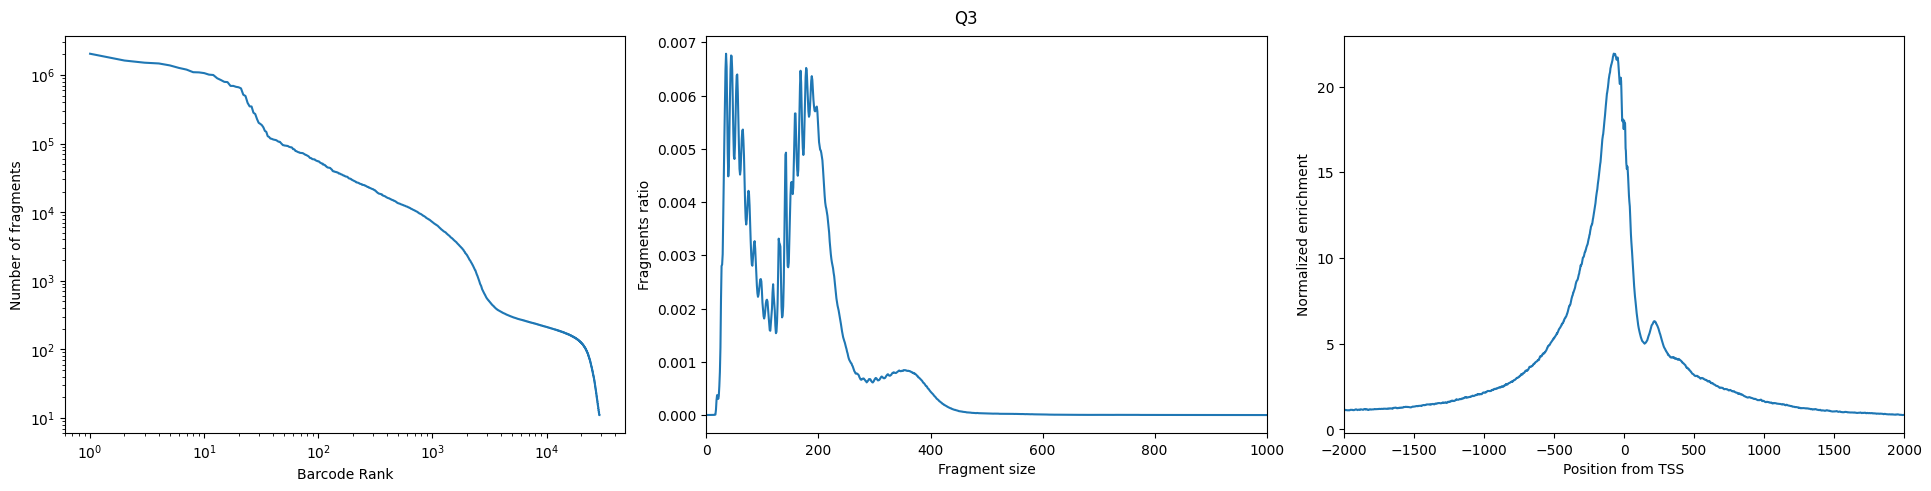

In [44]:
for sample_id in fragments_dict:
    fig = plot_sample_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc"
    )
    fig.savefig(f"outs/qc/{sample_id}_ATAC_QC_stats_short.pdf",dpi=300)
    plt.show() 
    plt.close(fig) 

In [45]:
from pycisTopic.qc import get_barcodes_passing_qc_for_sample
sample_id_to_barcodes_passing_filters = {}
sample_id_to_thresholds = {}
for sample_id in fragments_dict:
    (
        sample_id_to_barcodes_passing_filters[sample_id],
        sample_id_to_thresholds[sample_id]
    ) = get_barcodes_passing_qc_for_sample(
            sample_id = sample_id,
            pycistopic_qc_output_dir = "outs/qc",
            unique_fragments_threshold = 1000, # use automatic thresholding when you specify None
            tss_enrichment_threshold = 10, # use automatic thresholding
            frip_threshold = 0,
            use_automatic_thresholds = True,
    )

Q3:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10


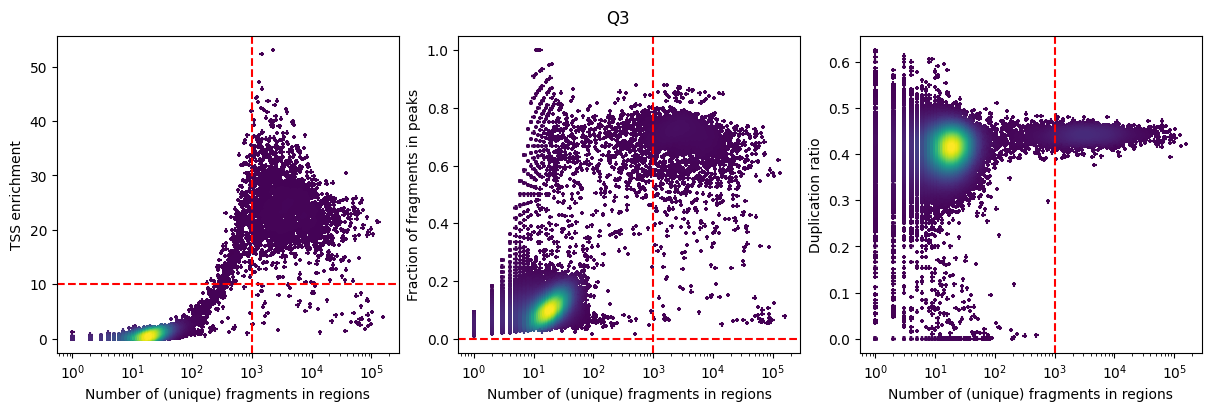

In [46]:
for sample_id in fragments_dict:
    fig = plot_barcode_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc",
        bc_passing_filters = sample_id_to_barcodes_passing_filters[sample_id],
        detailed_title = False,
        **sample_id_to_thresholds[sample_id] 
    )
    fig.savefig(f"outs/qc/{sample_id}_ATAC_QC_cell_stats_short.pdf",dpi=300)
    plt.show() 
    plt.close(fig)

# Creating a cisTopic object

In [ ]:
path_to_regions = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
path_to_blacklist="/regions/hg38-blacklist.v2.bed"
pycistopic_qc_output_dir = "outs/qc"

from pycisTopic.cistopic_class import create_cistopic_object_from_fragments
import polars as pl

cistopic_obj_list = []
for sample_id in fragments_dict:
    sample_metrics = pl.read_parquet(
        os.path.join(pycistopic_qc_output_dir, f'{sample_id}.fragments_stats_per_cb.parquet')
    ).to_pandas().set_index("CB").loc[ sample_id_to_barcodes_passing_filters[sample_id] ]
    cistopic_obj = create_cistopic_object_from_fragments(
        path_to_fragments = fragments_dict[sample_id],
        path_to_regions = path_to_regions,
        path_to_blacklist = path_to_blacklist,
        metrics = sample_metrics,
        valid_bc = sample_id_to_barcodes_passing_filters[sample_id],
        n_cpu = 5,
        project = sample_id,
        split_pattern = '-'
    )
    cistopic_obj_list.append(cistopic_obj)

2025-07-10 17:22:45,854 cisTopic     INFO     Reading data for Q3
2025-07-10 17:23:17,606 cisTopic     INFO     metrics provided!
2025-07-10 17:23:19,773 cisTopic     INFO     Counting fragments in regions


2025-07-10 17:23:23,197	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-10 17:23:35,176 cisTopic     INFO     Creating fragment matrix
2025-07-10 17:23:42,340 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-07-10 17:23:44,701 cisTopic     INFO     Removing blacklisted regions
2025-07-10 17:23:45,220 cisTopic     INFO     Creating CistopicObject
2025-07-10 17:23:45,644 cisTopic     INFO     Done!


In [48]:
cistopic_obj = cistopic_obj_list[0]
print(cistopic_obj)

CistopicObject from project Q3 with n_cells × n_regions = 2258 × 179881


In [49]:
from pycisTopic.cistopic_class import merge
cistopic_obj = merge(cistopic_obj_list)

## Doublet filtering

In [50]:
dbl = cistopic_obj.cell_data.total_fragments_count > 60000
cistopic_obj.cell_data['doublets_atac'] = dbl
cistopic_obj.cell_data['doublets_atac'].value_counts()

False    2119
True      139
Name: doublets_atac, dtype: int64

In [51]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,log10_unique_fragments_in_peaks_count,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac
ACGCAAGCAGGAATCG-1-Q3___Q3,20049,4.302093,14510,4.161667,Q3,190,55419,4.743667,30767,4.488099,...,4.294731,0.640654,24652,0.444829,24.637034,0.001652,0.081951,0.508806,ACGCAAGCAGGAATCG-1,False
AACTACTCAAGTCGCT-1-Q3___Q3,6785,3.83155,5660,3.752816,Q3,692,18389,4.264582,10676,4.028449,...,3.825815,0.627108,7713,0.419436,24.862052,0.005086,0.186507,0.551537,AACTACTCAAGTCGCT-1,False
AGCCAGTGTCATAACG-1-Q3___Q3,9067,3.957464,7922,3.898835,Q3,403,29614,4.471512,16228,4.210292,...,3.951823,0.551454,13386,0.452016,17.980282,0.001964,0.050032,1.121027,AGCCAGTGTCATAACG-1,False
TTGGCTGAGCGATAGA-1-Q3___Q3,38203,4.582097,26275,4.419543,Q3,41,202325,5.306052,113930,5.056642,...,4.574934,0.329825,88395,0.436896,12.684898,0.000128,0.005536,0.209282,TTGGCTGAGCGATAGA-1,True
AGACAATAGTAACCAC-1-Q3___Q3,2602,3.415307,2403,3.380754,Q3,1455,7644,3.883377,4261,3.629613,...,3.407731,0.599859,3383,0.442569,26.104412,0.004721,0.116732,1.773470,AGACAATAGTAACCAC-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TATAGCTCATTGCGAC-1-Q3___Q3,1931,3.285782,1811,3.257918,Q3,1936,4791,3.680517,2560,3.408410,...,3.281715,0.746875,2231,0.465665,27.570784,0.003481,0.389275,0.518058,TATAGCTCATTGCGAC-1,False
AAACGCGCAACAACAA-1-Q3___Q3,1081,3.033826,1001,3.000434,Q3,2324,2622,3.418798,1519,3.181844,...,3.030195,0.705069,1103,0.420671,39.313674,0.000137,0.304121,0.554992,AAACGCGCAACAACAA-1,False
CGAGGAAGTGTGAGAG-1-Q3___Q3,1476,3.169086,1377,3.138934,Q3,2156,3512,3.545678,1936,3.287130,...,3.162564,0.750517,1576,0.448747,29.517257,0.002577,0.280806,1.202149,CGAGGAAGTGTGAGAG-1,False
AGCCGGTTCGTTACTT-1-Q3___Q3,1291,3.110926,1259,3.100026,Q3,2085,3874,3.588272,2121,3.326745,...,3.104487,0.599246,1753,0.452504,25.182607,0.003094,0.072250,0.954257,AGCCGGTTCGTTACTT-1,False


In [ ]:
# RNA doublets
rna_dbl = pd.read_csv('/barcode_doublet_Q3_short.tsv', sep = '\t')
rna_dbl['base_index'] = rna_dbl['Unnamed: 0']#.str.split('-').str[0]
rna_dbl['pycistopic_CB'] = rna_dbl['base_index'] +'-Q3___Q3'
rna_dbl = rna_dbl[['doublet_outlier','pycistopic_CB']]
rna_dbl = rna_dbl.set_index('pycistopic_CB')
rna_dbl

,doublet_outlier
pycistopic_CB,
AAACAGCCAGCATGGA-1-Q3___Q3,False
AAACAGCCATGCTATG-1-Q3___Q3,False
AAACATGCATGAATCT-1-Q3___Q3,False
AAACCAACAGCATTAT-1-Q3___Q3,False
AAACCGAAGCACAGAA-1-Q3___Q3,False
...,...
TTTGTGAAGCATGAAG-1-Q3___Q3,False
TTTGTGAAGCGAGTAA-1-Q3___Q3,False
TTTGTGAAGCTTTGGG-1-Q3___Q3,False


In [53]:
cistopic_obj.cell_data = cistopic_obj.cell_data.join(rna_dbl, how='left')
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
ACGCAAGCAGGAATCG-1-Q3___Q3,20049,4.302093,14510,4.161667,Q3,190,55419,4.743667,30767,4.488099,...,0.640654,24652,0.444829,24.637034,0.001652,0.081951,0.508806,ACGCAAGCAGGAATCG-1,False,False
AACTACTCAAGTCGCT-1-Q3___Q3,6785,3.83155,5660,3.752816,Q3,692,18389,4.264582,10676,4.028449,...,0.627108,7713,0.419436,24.862052,0.005086,0.186507,0.551537,AACTACTCAAGTCGCT-1,False,False
AGCCAGTGTCATAACG-1-Q3___Q3,9067,3.957464,7922,3.898835,Q3,403,29614,4.471512,16228,4.210292,...,0.551454,13386,0.452016,17.980282,0.001964,0.050032,1.121027,AGCCAGTGTCATAACG-1,False,False
TTGGCTGAGCGATAGA-1-Q3___Q3,38203,4.582097,26275,4.419543,Q3,41,202325,5.306052,113930,5.056642,...,0.329825,88395,0.436896,12.684898,0.000128,0.005536,0.209282,TTGGCTGAGCGATAGA-1,True,True
AGACAATAGTAACCAC-1-Q3___Q3,2602,3.415307,2403,3.380754,Q3,1455,7644,3.883377,4261,3.629613,...,0.599859,3383,0.442569,26.104412,0.004721,0.116732,1.773470,AGACAATAGTAACCAC-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TATAGCTCATTGCGAC-1-Q3___Q3,1931,3.285782,1811,3.257918,Q3,1936,4791,3.680517,2560,3.408410,...,0.746875,2231,0.465665,27.570784,0.003481,0.389275,0.518058,TATAGCTCATTGCGAC-1,False,False
AAACGCGCAACAACAA-1-Q3___Q3,1081,3.033826,1001,3.000434,Q3,2324,2622,3.418798,1519,3.181844,...,0.705069,1103,0.420671,39.313674,0.000137,0.304121,0.554992,AAACGCGCAACAACAA-1,False,False
CGAGGAAGTGTGAGAG-1-Q3___Q3,1476,3.169086,1377,3.138934,Q3,2156,3512,3.545678,1936,3.287130,...,0.750517,1576,0.448747,29.517257,0.002577,0.280806,1.202149,CGAGGAAGTGTGAGAG-1,False,False
AGCCGGTTCGTTACTT-1-Q3___Q3,1291,3.110926,1259,3.100026,Q3,2085,3874,3.588272,2121,3.326745,...,0.599246,1753,0.452504,25.182607,0.003094,0.072250,0.954257,AGCCGGTTCGTTACTT-1,False,False


In [54]:
cistopic_obj.cell_data[cistopic_obj.cell_data['doublet_outlier'] == True]

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
TTGGCTGAGCGATAGA-1-Q3___Q3,38203,4.582097,26275,4.419543,Q3,41,202325,5.306052,113930,5.056642,...,0.329825,88395,0.436896,12.684898,0.000128,0.005536,0.209282,TTGGCTGAGCGATAGA-1,True,True
GTTTGTAAGTCTTGAA-1-Q3___Q3,33695,4.527565,23057,4.362803,Q3,44,194151,5.288142,108541,5.035598,...,0.305083,85610,0.440945,18.023008,0.000434,0.006003,0.269266,GTTTGTAAGTCTTGAA-1,True,True
TACATCAAGAACAAGT-1-Q3___Q3,100924,5.003994,47506,4.676748,Q3,33,308698,5.489535,172631,5.237121,...,0.574665,136067,0.440777,20.232534,0.000266,0.007843,0.058856,TACATCAAGAACAAGT-1,True,True
CGAAATGAGCTGGCTA-1-Q3___Q3,40779,4.610437,25703,4.409984,Q3,80,119574,5.077640,67113,4.826813,...,0.596785,52461,0.438733,20.004495,0.000565,0.025584,0.200072,CGAAATGAGCTGGCTA-1,True,True
ACTTTGTTCACAGGAA-1-Q3___Q3,106790,5.028531,48628,4.686886,Q3,32,329014,5.517216,185836,5.269132,...,0.564326,143178,0.435173,19.160513,0.000128,0.006387,0.050858,ACTTTGTTCACAGGAA-1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCAGTGAGTGTAATAC-1-Q3___Q3,28404,4.45338,19624,4.292788,Q3,139,67113,4.826813,38903,4.589994,...,0.718428,28210,0.420336,23.452075,0.001254,0.044276,0.111469,TCAGTGAGTGTAATAC-1,True,True
ACGCCACAGTCACCTC-1-Q3___Q3,9574,3.981093,8406,3.924589,Q3,384,30338,4.482001,17040,4.231495,...,0.553110,13298,0.438328,16.676323,0.001075,0.051010,1.196322,ACGCCACAGTCACCTC-1,False,True
ATAATGGCACTTAGGC-1-Q3___Q3,6159,3.78951,5516,3.741624,Q3,860,15608,4.193375,8595,3.934296,...,0.704363,7013,0.449321,25.577855,0.005175,0.343434,1.445912,ATAATGGCACTTAGGC-1,False,True
CTTACTAGTGCTTACT-1-Q3___Q3,2078,3.317646,2009,3.30298,Q3,1443,7822,3.893373,4318,3.635383,...,0.474294,3504,0.447967,20.384075,0.004362,0.028674,1.523903,CTTACTAGTGCTTACT-1,False,True


In [55]:
cistopic_obj.cell_data['doublet_outlier'].isna().value_counts()


False    2253
True        5
Name: doublet_outlier, dtype: int64

In [56]:
# fill nans as False so NaNs are kept in
cistopic_obj.cell_data['doublet_outlier'] = cistopic_obj.cell_data['doublet_outlier'].fillna(False)

In [57]:
# doublet barcodes - save for futue
cistopic_obj.cell_data[
    (cistopic_obj.cell_data.total_fragments_count > 60000)
].index.to_series().to_csv('outs/barcode_doublets_atac.csv', index = False)

In [58]:
cells_to_keep = cistopic_obj.cell_data[(cistopic_obj.cell_data['doublet_outlier'] == False) & (cistopic_obj.cell_data['doublets_atac'] == False)].index.tolist()
len(cells_to_keep)

2108

In [59]:
cistopic_obj.subset(cells=cells_to_keep)

In [60]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 2108 × 179331


In [61]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

# Add metadata to cistopic object

In [62]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
ACGCAAGCAGGAATCG-1-Q3___Q3,20049,4.302093,14510,4.161667,Q3,190,55419,4.743667,30767,4.488099,...,0.640654,24652,0.444829,24.637034,0.001652,0.081951,0.508806,ACGCAAGCAGGAATCG-1,False,False
AACTACTCAAGTCGCT-1-Q3___Q3,6785,3.83155,5660,3.752816,Q3,692,18389,4.264582,10676,4.028449,...,0.627108,7713,0.419436,24.862052,0.005086,0.186507,0.551537,AACTACTCAAGTCGCT-1,False,False
AGCCAGTGTCATAACG-1-Q3___Q3,9067,3.957464,7922,3.898835,Q3,403,29614,4.471512,16228,4.210292,...,0.551454,13386,0.452016,17.980282,0.001964,0.050032,1.121027,AGCCAGTGTCATAACG-1,False,False
AGACAATAGTAACCAC-1-Q3___Q3,2602,3.415307,2403,3.380754,Q3,1455,7644,3.883377,4261,3.629613,...,0.599859,3383,0.442569,26.104412,0.004721,0.116732,1.773470,AGACAATAGTAACCAC-1,False,False
CGATGTCCACGTAATT-1-Q3___Q3,13796,4.139753,11665,4.066885,Q3,215,48331,4.684235,27219,4.434888,...,0.499467,21112,0.436821,16.708066,0.000945,0.023678,0.755477,CGATGTCCACGTAATT-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TATAGCTCATTGCGAC-1-Q3___Q3,1931,3.285782,1811,3.257918,Q3,1936,4791,3.680517,2560,3.408410,...,0.746875,2231,0.465665,27.570784,0.003481,0.389275,0.518058,TATAGCTCATTGCGAC-1,False,False
AAACGCGCAACAACAA-1-Q3___Q3,1081,3.033826,1001,3.000434,Q3,2324,2622,3.418798,1519,3.181844,...,0.705069,1103,0.420671,39.313674,0.000137,0.304121,0.554992,AAACGCGCAACAACAA-1,False,False
CGAGGAAGTGTGAGAG-1-Q3___Q3,1476,3.169086,1377,3.138934,Q3,2156,3512,3.545678,1936,3.287130,...,0.750517,1576,0.448747,29.517257,0.002577,0.280806,1.202149,CGAGGAAGTGTGAGAG-1,False,False
AGCCGGTTCGTTACTT-1-Q3___Q3,1291,3.110926,1259,3.100026,Q3,2085,3874,3.588272,2121,3.326745,...,0.599246,1753,0.452504,25.182607,0.003094,0.072250,0.954257,AGCCGGTTCGTTACTT-1,False,False


In [63]:
rna_cell_type.index = rna_cell_type.index.astype(str) + '-Q3___Q3'

In [64]:
import pandas as pd

cistopic_obj.add_cell_data(rna_cell_type) # use data from rna for cell type
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

In [65]:
cistopic_obj.cell_data


,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier,cell_type,sample
ACGCAAGCAGGAATCG-1-Q3___Q3,20049,4.302093,14510,4.161667,Q3,190,55419,4.743667,30767,4.488099,...,0.444829,24.637034,0.001652,0.081951,0.508806,ACGCAAGCAGGAATCG-1,False,False,Tem_Trm_cytotoxic_T_cells,Q3
AACTACTCAAGTCGCT-1-Q3___Q3,6785,3.83155,5660,3.752816,Q3,692,18389,4.264582,10676,4.028449,...,0.419436,24.862052,0.005086,0.186507,0.551537,AACTACTCAAGTCGCT-1,False,False,Tcm_Naive_helper_T_cells,Q3
AGCCAGTGTCATAACG-1-Q3___Q3,9067,3.957464,7922,3.898835,Q3,403,29614,4.471512,16228,4.210292,...,0.452016,17.980282,0.001964,0.050032,1.121027,AGCCAGTGTCATAACG-1,False,False,Classical_monocytes,Q3
AGACAATAGTAACCAC-1-Q3___Q3,2602,3.415307,2403,3.380754,Q3,1455,7644,3.883377,4261,3.629613,...,0.442569,26.104412,0.004721,0.116732,1.773470,AGACAATAGTAACCAC-1,False,False,Pro-B_cells_Q3,Q3
CGATGTCCACGTAATT-1-Q3___Q3,13796,4.139753,11665,4.066885,Q3,215,48331,4.684235,27219,4.434888,...,0.436821,16.708066,0.000945,0.023678,0.755477,CGATGTCCACGTAATT-1,False,False,Pro-B_cells_Q3,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TATAGCTCATTGCGAC-1-Q3___Q3,1931,3.285782,1811,3.257918,Q3,1936,4791,3.680517,2560,3.408410,...,0.465665,27.570784,0.003481,0.389275,0.518058,TATAGCTCATTGCGAC-1,False,False,Pro-B_cells_Q3,Q3
AAACGCGCAACAACAA-1-Q3___Q3,1081,3.033826,1001,3.000434,Q3,2324,2622,3.418798,1519,3.181844,...,0.420671,39.313674,0.000137,0.304121,0.554992,AAACGCGCAACAACAA-1,False,False,Classical_monocytes,Q3
CGAGGAAGTGTGAGAG-1-Q3___Q3,1476,3.169086,1377,3.138934,Q3,2156,3512,3.545678,1936,3.287130,...,0.448747,29.517257,0.002577,0.280806,1.202149,CGAGGAAGTGTGAGAG-1,False,False,Tem_Trm_cytotoxic_T_cells,Q3
AGCCGGTTCGTTACTT-1-Q3___Q3,1291,3.110926,1259,3.100026,Q3,2085,3874,3.588272,2121,3.326745,...,0.452504,25.182607,0.003094,0.072250,0.954257,AGCCGGTTCGTTACTT-1,False,False,Pro-B_cells_Q3,Q3


In [66]:
cistopic_obj.cell_data.cell_type.value_counts()

Pro-B_cells_Q3               1496
Tem_Trm_cytotoxic_T_cells     183
Tcm_Naive_helper_T_cells      140
Classical_monocytes            79
Naive_B_cells                  19
Memory_B_cells                 17
Mid_erythroid                  13
Name: cell_type, dtype: int64

In [67]:
cistopic_obj.cell_data.cell_type.isna().sum()

161

# CisTopic running

In [68]:
!wget https://github.com/mimno/Mallet/releases/download/v202108/Mallet-202108-bin.tar.gz
!tar -xf Mallet-202108-bin.tar.gz

/bin/bash: line 1: wget: command not found


In [ ]:
!cat 02_pycistopic_modelling.py

In [ ]:
!cat 02_pycistopic_modelling.slurm

In [ ]:
!mkdir -p /ray_spill/mallet/tutorial2/

and I submitted 02_pycistopic_modelling.slurm  as a slurm job 
```
sbatch 02_pycistopic_modelling.slurm
```

In [72]:
pip list

Package                              Version
------------------------------------ -----------------
adjustText                           1.0.4
aiohttp                              3.9.3
aiosignal                            1.3.1
anndata                              0.10.5.post1
annoy                                1.17.3
appdirs                              1.4.4
arboreto                             0.1.6
argparse-dataclass                   2.0.0
array_api_compat                     1.5.1
asttokens                            2.4.1
attr                                 0.3.2
attrs                                23.2.0
bbknn                                1.6.0
beautifulsoup4                       4.12.3
bidict                               0.23.1
bioservices                          1.11.2
blosc2                               2.5.1
bokeh                                3.4.0
boltons                              23.1.1
bs4                                  0.0.2
cattrs                     